Import all the required Libraries and Data Frame

In [1]:
import pandas as pd
import numpy as np

#%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

Read the Dataset

In [2]:
df=pd.read_csv('data.csv')
type(df)

pandas.core.frame.DataFrame

Clean and Prepara the data

In [3]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
val=df['diagnosis'].isna().sum()
print("The sum is",val)

The sum is 0


In [6]:
df['diagnosis'] = df['diagnosis'].fillna(0)  # or 1 depending on context

In [7]:
df['diagnosis'] =df['diagnosis'].map({'M':1,'B':0})


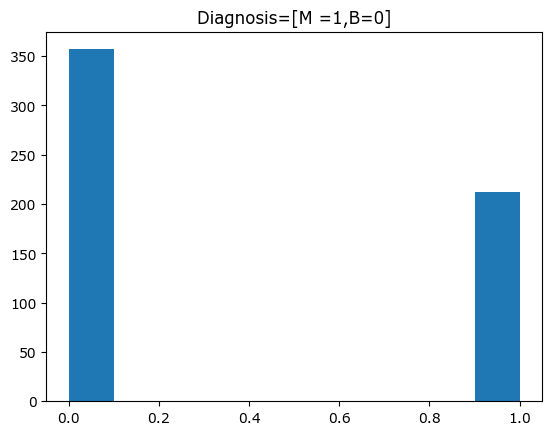

In [8]:
df.describe()
plt.hist(df['diagnosis'].dropna())  # remove any NaNs just in case
plt.title('Diagnosis=[M =1,B=0]')
plt.show()

In [9]:
features_mean=list(df.columns[1:11])
#Slpitt he database into two set  based on the diagnosis
dfM=df[df['diagnosis']==1]
dfB=df[df['diagnosis']==0]

In [10]:
dfM.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
dfB.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


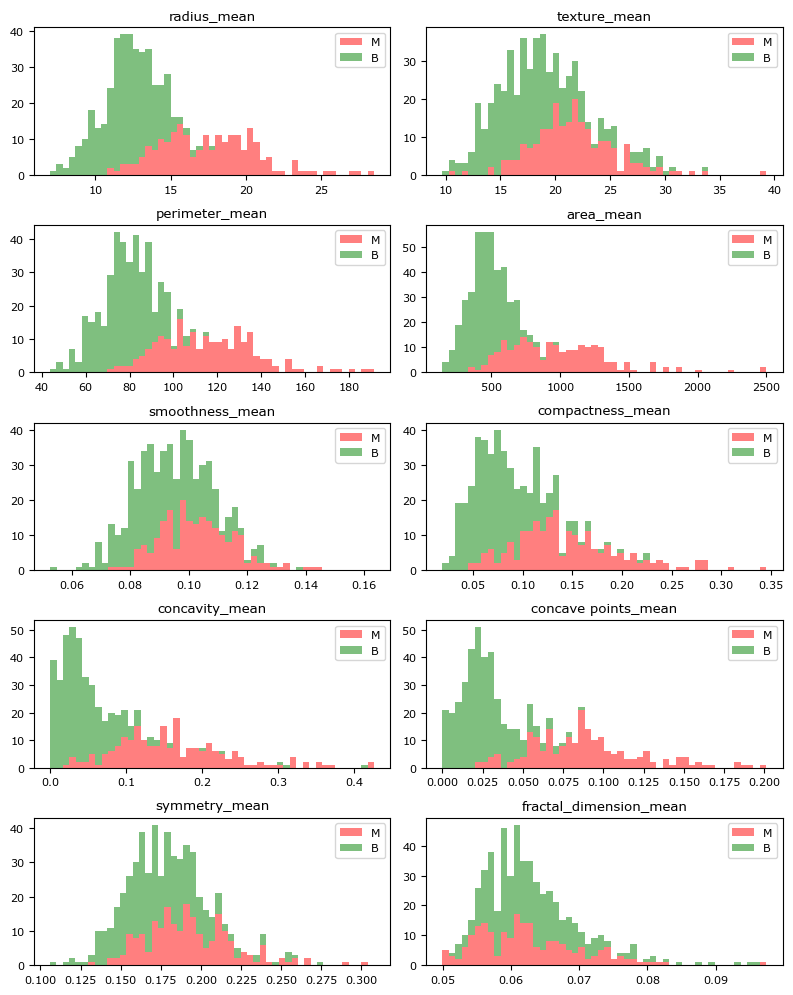

In [12]:

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [ ]:
#Obeservations from the above graphs:
#mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
#mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.


In [13]:
#Creating a set of Training data and Testing data
traindf, testdf = train_test_split(df, test_size = 0.3,random_state =42)
from sklearn.preprocessing import StandardScaler

In [14]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

def classification_model(model, data, predictors, outcome):

    # 1️⃣ Fit the model
    model.fit(data[predictors], data[outcome])

    # 2️⃣ Make predictions on training set
    predictions = model.predict(data[predictors])

    # 3️⃣ Print accuracy
    accuracy = metrics.accuracy_score(data[outcome], predictions)
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    # 4️⃣ Perform K-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []

    for train_index, test_index in kf.split(data):
        # Training data
        train_predictors = data[predictors].iloc[train_index]
        train_target = data[outcome].iloc[train_index]

        # Test data
        test_predictors = data[predictors].iloc[test_index]
        test_target = data[outcome].iloc[test_index]

        # Train model
        model.fit(train_predictors, train_target)

        # Score
        score = model.score(test_predictors, test_target)
        cv_scores.append(score)

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_scores)))

    # 5️⃣ Refit model on full data
    model.fit(data[predictors], data[outcome])


In [16]:
#Logistic Regression Model using all the features
predictor_var = [
    'radius_mean',
    'perimeter_mean',
    'area_mean',
    'compactness_mean',
    'concave points_mean'
]

# Create scaler
scaler = StandardScaler()

# Fit scaler ONLY on training predictors
scaler.fit(traindf[predictor_var])

# Transform train & test data
X_train_scaled = scaler.transform(traindf[predictor_var])
X_test_scaled  = scaler.transform(testdf[predictor_var])

y_train = traindf['diagnosis']
y_test  = testdf['diagnosis']

outcome_var = 'diagnosis'

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

# Accuracy
train_pred = model.predict(X_train_scaled)
print("Train Accuracy:", metrics.accuracy_score(y_train, train_pred))

test_pred = model.predict(X_test_scaled)
print("Test Accuracy:", metrics.accuracy_score(y_test, test_pred))

classification_model(model, traindf, predictor_var, outcome_var)

Train Accuracy: 0.9221105527638191
Test Accuracy: 0.9064327485380117
Accuracy : 88.442%
Cross-Validation Score : 88.206%


In [17]:
#if Prediction for LogisticRegression is done based on single variable using radius_mean
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 86.935%
Cross-Validation Score : 86.946%


In [18]:
#Prediction based on Decission Tree Classifier
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 89.693%


In [19]:
#if Prediction for DecissionTreeClassifier done based on single variable using radius_mean
predictor_var = ['radius_mean']
model=DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 96.985%
Cross-Validation Score : 82.174%


In [20]:
#Random Forest Classifier.using all the features
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 95.980%
Cross-Validation Score : 92.715%


In [21]:
#Create a series with feature importance
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.214183
area_mean                 0.177664
concavity_mean            0.171601
perimeter_mean            0.141821
radius_mean               0.111386
compactness_mean          0.074802
texture_mean              0.057079
smoothness_mean           0.026240
symmetry_mean             0.013311
fractal_dimension_mean    0.011913
dtype: float64


In [22]:
# Using top 5 features from the above calculation
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 94.975%
Cross-Validation Score : 91.965%


In [23]:
#Using a single feature
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)


Accuracy : 96.985%
Cross-Validation Score : 81.924%


In [24]:
#Using on the Test data

# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 97.076%
Cross-Validation Score : 93.529%


In [25]:
import pickle


# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save scaler
with open('scaling_new.pkl', 'wb') as f:
    pickle.dump(scaler, f)